In [ ]:
# Instalando as bibliotecas sidetable e pandas-profiling usando o comando de instalação do pip
!pip install sidetable
!pip install pandas-profiling==3.3.0


In [ ]:
# Importando diversas bibliotecas úteis para análise e visualização de dados
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets
from datetime import datetime

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform


In [ ]:
# Configurando o tema e estilo visual para os gráficos usando a biblioteca Seaborn (sns)
# O tema é configurado como 'talk', o estilo como 'ticks' e a escala da fonte como 0.8
# O tamanho padrão da figura (figure.figsize) é ajustado para (12, 8)
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=0.8,
    rc={
        'figure.figsize': (12, 8)
    }
)


In [ ]:
# Definindo uma função chamada list_attributes que lista os atributos e métodos de um objeto
# A função recebe um objeto (obj) como parâmetro
# Utilizando uma compreensão de lista para iterar sobre os atributos do objeto e filtrar aqueles que não começam com '_'
# Retornando a lista resultante de atributos e métodos
def list_attributes(obj):
    """Lista atributos e funções de um objeto"""
    return [attr for attr in obj.__dir__() if not attr.startswith('_')]


In [ ]:
# Etapa 01) Lendo o arquivo e inspecionando os dados
import pandas as pd
ecommerce = pd.read_csv('/content/e-commerce.csv', encoding='ISO-8859-1')
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Gerando estatísticas descritivas para o DataFrame 'ecommerce'
# Utilizando o método describe(), que calcula várias estatísticas, como média, desvio padrão, mínimo, máximo, quartis, etc.
ecommerce.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Exibindo as primeiras linhas do DataFrame 'ecommerce'
# Utilizando o método head(), que por padrão retorna as cinco primeiras linhas do DataFrame
ecommerce.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Criando um DataFrame 'ecommerce_missing' para analisar dados ausentes no DataFrame 'ecommerce'
# Utilizando o método isna() para identificar valores ausentes e o método sum() para contar a quantidade de valores ausentes em cada coluna
# Criando colunas 'missing_count' e 'missing_pct' que representam a contagem e a porcentagem de valores ausentes, respectivamente
# Ordenando o DataFrame 'ecommerce_missing' com base na contagem de valores ausentes em ordem decrescente
# Aplicando formatação para exibir a porcentagem de valores ausentes com duas casas decimais
ecommerce_missing = (
  ecommerce.isna().sum()
  .to_frame('missing_count')
  .join((ecommerce.isna().sum() / ecommerce.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)

ecommerce_missing.style.format('{:.2%}', subset=['missing_pct'])


,missing_count,missing_pct
CustomerID,135080,24.93%
Description,1454,0.27%
InvoiceNo,0,0.00%
StockCode,0,0.00%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
Country,0,0.00%


In [ ]:
# Removendo os valores nulos
ecommerce_sem_nulos = ecommerce.dropna(subset=['CustomerID','Description'])

In [ ]:
# Etapa 03) Preços unitários e quantidade de produtos iguais ou inferior a 0
# Realize um filtro para verificar se existem dados nulos ou menor que zero na coluna de preços e na coluna de quantidade
ecommerce_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
# Gerando estatísticas descritivas para as colunas 'Quantity' e 'UnitPrice' do DataFrame 'ecommerce_sem_nulos'
# Utilizando o método describe() para calcular várias estatísticas, como média, desvio padrão, mínimo, máximo, quartis, etc.
ecommerce_sem_nulos[["Quantity", "UnitPrice"]].describe()


,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [ ]:
# Realizando um filtro para verificar se existem dados nulos ou menor que zero nas coluna de preços e quantidade

preco_errado = ecommerce_sem_nulos.query("UnitPrice < 0")
preco_correto = ecommerce_sem_nulos.query("UnitPrice > 0")


quantidade_errada = ecommerce_sem_nulos.query("Quantity < 0")
quantidade_correta = ecommerce_sem_nulos.query("Quantity > 0")

In [ ]:
# Filtrando o dataset apenas para conter preços acima de zero
preco_correto.describe()

,Quantity,UnitPrice,CustomerID
count,406789.000000,406789.000000,406789.000000
mean,12.028359,3.460811,15287.795830
std,247.927842,69.318561,1713.573064
min,-80995.000000,0.001000,12346.000000
25%,2.000000,1.250000,13954.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Filtrnado o dataset apenas para conter preços acima de zero
quantidade_correta.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
# Etapa 04) Verifique se existem linhas duplicadas
ecommerce_sem_nulos.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 406829, dtype: bool

In [ ]:
# Identificando valores duplicados
ecommerce_sem_nulos[ecommerce_sem_nulos.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
# Identificando quantos valores duplicados há em cada duplicata
(
  ecommerce_sem_nulos
  .groupby(ecommerce_sem_nulos.columns.tolist(), dropna=False)
  .size()
  .to_frame('n_duplicates')
  .query('n_duplicates>1')
  .sort_values('n_duplicates',ascending=False)
  .head(5)
)

n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
572344    M         Manual                              48       10/24/2011 10:43 1.50      14607.0    United Kingdom             6
540524    21756     BATH BUILDING BLOCK WORD            1        1/9/2011 12:53   5.95      16735.0    United Kingdom             6

In [ ]:
# Remover valores duplicados
ecommerce_sem_nulos.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# Etapa 05) Tipos de dados da coluna
ecommerce_sem_nulos.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
TotalPrice            float64
dtype: object

In [ ]:
# Convertendo os tipos de dados das colunas 'CustomerID' para int e 'InvoiceDate' para datetime64
# Utilizando o método astype() para realizar as conversões no DataFrame 'ecommerce_sem_nulos'
ecommerce_sem_nulos = ecommerce_sem_nulos.astype({"CustomerID": "int", "InvoiceDate": "datetime64"})


In [ ]:
# Exibindo informações sobre o DataFrame 'ecommerce_sem_nulos'
# Utilizando o método info(), que fornece uma visão geral sobre o número de entradas não nulas, tipos de dados, e uso de memória
ecommerce_sem_nulos.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [ ]:
# Etapa 06) Tratando os outliers

ecommerce_sem_nulos = datasets.load_ecommerce_sem_nulos(return_X_y=True, as_frame=True)
print(ecommerce_sem_nulos.shape)
ecommerce_sem_nulos.head()

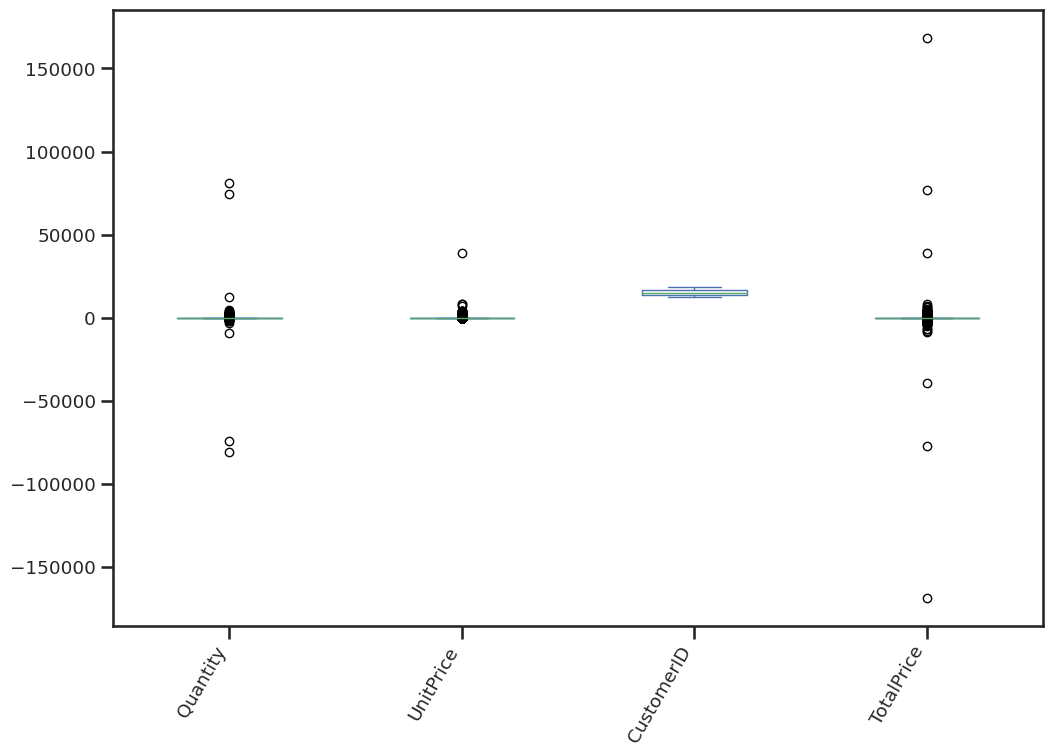

In [ ]:
# Criando um gráfico de caixa (boxplot) para visualizar a distribuição das variáveis numéricas no DataFrame 'ecommerce_sem_nulos'
# Utilizando o método plot.box() para gerar o gráfico de caixa
# Ajustando a rotação dos rótulos no eixo x para melhor legibilidade
ecommerce_sem_nulos.plot.box()
plt.xticks(rotation=60, ha='right');


In [ ]:
# Criando um gráfico de caixa (boxplot) para visualizar a distribuição das variáveis numéricas no DataFrame 'ecommerce_sem_nulos' após aplicar a escala
# Utilizando o método apply(scale) para aplicar a escala às variáveis numéricas
# Em seguida, utilizando o método plot.box() para gerar o gráfico de caixa das variáveis escaladas
# Ajustando a rotação dos rótulos no eixo x para melhor legibilidade
ecommerce_sem_nulos.apply(scale).plot.box()
plt.xticks(rotation=60, ha='right');


In [ ]:
# Definindo uma função chamada is_outlier para identificar valores atípicos em um array
# A função calcula os quartis (q1 e q3) e o intervalo interquartil (iqr) do array
# O fator de multiplicação (factor) é ajustado com base na condição extreme
# Calculando os limites superior (upper_outlier) e inferior (lower_outlier) para identificação de valores atípicos
# A função retorna uma máscara booleana indicando a presença de valores atípicos no array
def is_outlier(array, extreme=False):

  q1, q3, = np.quantile(array, [.5000, .10000])
  iqr = q3 - q1

  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor * iqr
  lower_outlier = q1 - factor * iqr

  return (array < lower_outlier) | (array > upper_outlier)


In [ ]:
# Contando a quantidade de valores atípicos na coluna 'Quantity' do DataFrame 'ecommerce_sem_nulos'
# Utilizando a função is_outlier para criar uma máscara booleana e, em seguida, somando os valores True na máscara
is_outlier(ecommerce_sem_nulos.Quantity).sum()


406829

In [ ]:
# Aplicando a função is_outlier a todas as colunas numéricas do DataFrame 'ecommerce_sem_nulos'
# Utilizando o método apply para criar uma máscara booleana para cada coluna, indicando valores atípicos
ecommerce_sem_nulos.apply(is_outlier)


In [ ]:
# Contando a quantidade de valores atípicos em cada coluna numérica do DataFrame 'ecommerce_sem_nulos'
# Utilizando a função is_outlier e o método apply para criar máscaras booleanas para cada coluna
# Em seguida, aplicando o método sum() para contar a quantidade de valores True em cada máscara
ecommerce_sem_nulos.apply(is_outlier).sum()


In [ ]:
# Filtrando as linhas do DataFrame 'ecommerce_sem_nulos' que contêm pelo menos um valor atípico em suas colunas numéricas
# Utilizando o método apply(is_outlier).any(axis=1) para criar uma máscara booleana indicando se pelo menos um valor atípico está presente em cada linha
# Aplicando essa máscara ao DataFrame original para obter apenas as linhas que contêm valores atípicos
ecommerce_sem_nulos[ecommerce_sem_nulos.apply(is_outlier).any(axis=1)]


In [ ]:
# Filtrando as linhas do DataFrame 'ecommerce_sem_nulos' que contêm pelo menos um valor atípico em suas colunas numéricas
# Utilizando o método apply(is_outlier).any(axis=1) para criar uma máscara booleana indicando se pelo menos um valor atípico está presente em cada linha
# Armazenando o resultado no DataFrame 'ecommerce_sem_nulos_without_outliers'

ecommerce_sem_nulos_without_outliers = ecommerce_sem_nulos[ecommerce_sem_nulos.apply(is_outlier).any(axis=1)]

# Criando uma figura com dois subgráficos (2 colunas)
# Configurando o tamanho da figura como (18, 6)
fig, axes = plt.subplots(ncols=2, figsize=(18, 6))

# Gerando um boxplot para as variáveis escaladas do DataFrame 'ecommerce_sem_nulos' antes da remoção de outliers
# Utilizando o método apply(scale).plot.box() para criar o gráfico
# Definindo um título para o subgráfico
ecommerce_sem_nulos.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')

# Gerando um boxplot para as variáveis escaladas do DataFrame 'ecommerce_sem_nulos_without_outliers' após a remoção de outliers
# Utilizando o método apply(scale).plot.box() para criar o gráfico
# Definindo um título para o subgráfico
ecommerce_sem_nulos_without_outliers.apply(scale).plot.box(ax=axes[1], title='Boxplot com filtro de outlier')

# Ajustando a rotação dos rótulos no eixo x para melhor legibilidade
fig.autofmt_xdate(rotation=60, ha='right')

# Exibindo a figura
plt.show()


In [ ]:
# Contando a quantidade de valores atípicos em cada coluna numérica do DataFrame 'ecommerce_sem_nulos_without_outliers'
# Utilizando a função is_outlier e o método apply para criar máscaras booleanas para cada coluna
# Em seguida, aplicando o método sum() para contar a quantidade de valores True em cada máscara
ecommerce_sem_nulos_without_outliers.apply(is_outlier).sum()


In [ ]:
# Etapa 07) Crie uma coluna adicional

ecommerce_sem_nulos['TotalPrice'] = ecommerce_sem_nulos['Quantity'] * ecommerce_sem_nulos['UnitPrice']

ecommerce_sem_nulos.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# Etapa 08) Última data
ecommerce_sem_nulos.max()

InvoiceNo                               C581569
StockCode                                  POST
Description    ZINC WIRE SWEETHEART LETTER TRAY
Quantity                                  80995
InvoiceDate                 2011-12-09 12:50:00
UnitPrice                               38970.0
CustomerID                                18287
Country                             Unspecified
TotalPrice                             168469.6
dtype: object

Text(0, 0.5, 'Valor Total de Vendas')

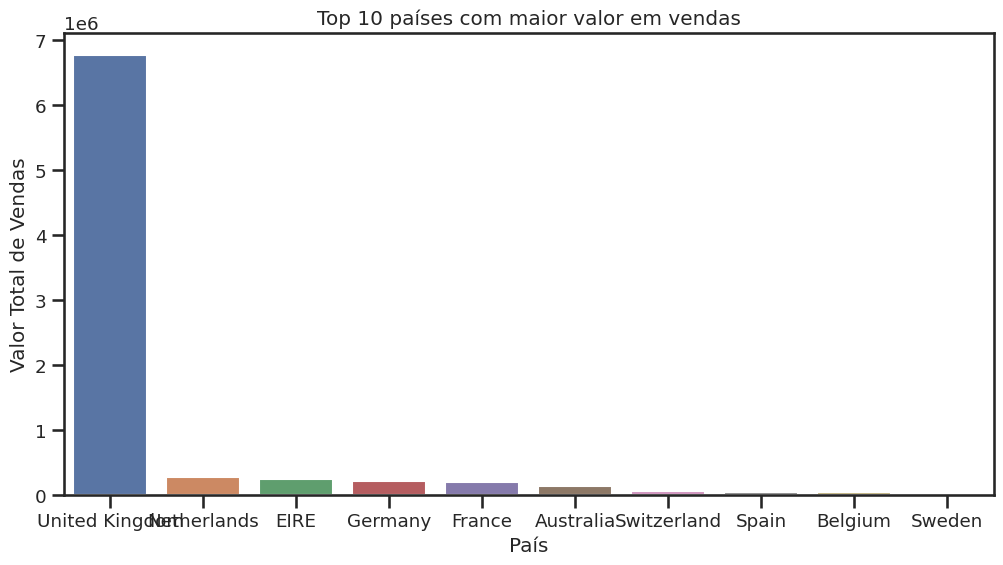

In [ ]:
# Etapa 09) Plotando gráficos
# Top 10 países com maior valor em vendas
ecommerce_sem_nulos["Month"] = ecommerce_sem_nulos["InvoiceDate"].dt.month

sales_by_country = ecommerce_sem_nulos.groupby("Country")["TotalPrice"].sum().reset_index()

top_10_countries = sales_by_country.sort_values(by="TotalPrice", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_10_countries, x="Country", y="TotalPrice")
plt.title("Top 10 países com maior valor em vendas")
plt.xlabel("País")
plt.ylabel("Valor Total de Vendas")

Text(0, 0.5, 'Quantidade vendida')

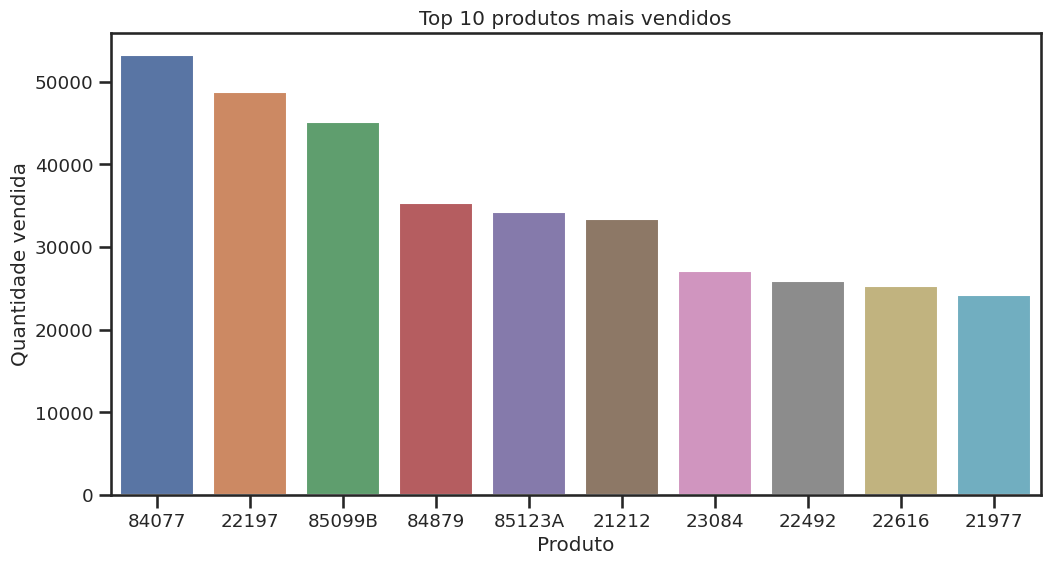

In [ ]:
# Top 10 produtos mais vendidos

sales_by_stockcode = ecommerce_sem_nulos.groupby("StockCode")["Quantity"].sum().reset_index()

top_10_product = sales_by_stockcode.sort_values(by="Quantity", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_10_product, x="StockCode", y="Quantity")
plt.title("Top 10 produtos mais vendidos")
plt.xlabel("Produto")
plt.ylabel("Quantidade vendida")

Text(0, 0.5, 'Valor de vendas')

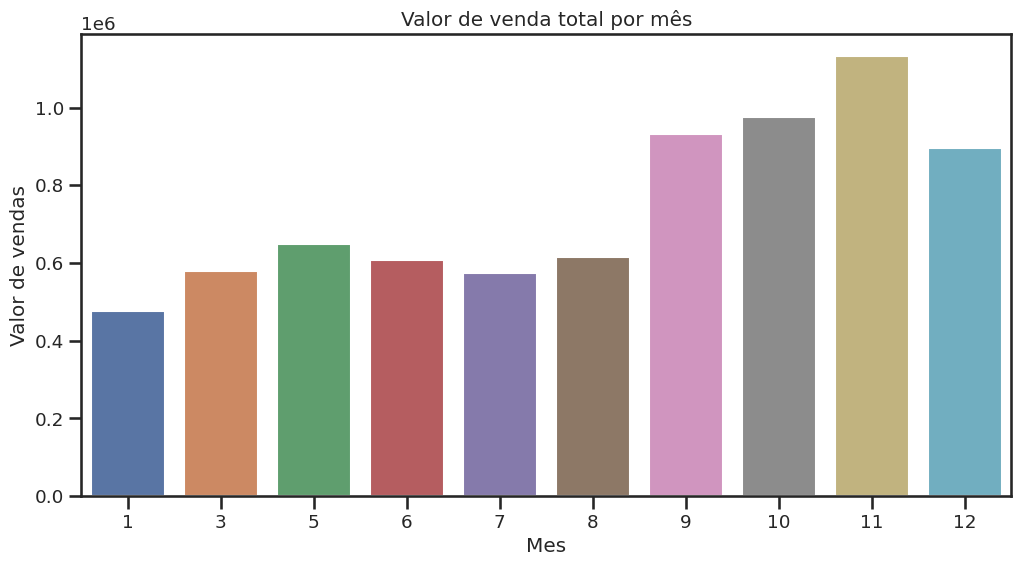

In [ ]:
# Valor de venda total por mês

sales_by_month = ecommerce_sem_nulos.groupby("Month")["TotalPrice"].sum().reset_index()

top_month = sales_by_month.sort_values(by="TotalPrice", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_month, x="Month", y="TotalPrice")
plt.title("Valor de venda total por mês")
plt.xlabel("Mes")
plt.ylabel("Valor de vendas")

Text(0, 0.5, 'Total de vendas')

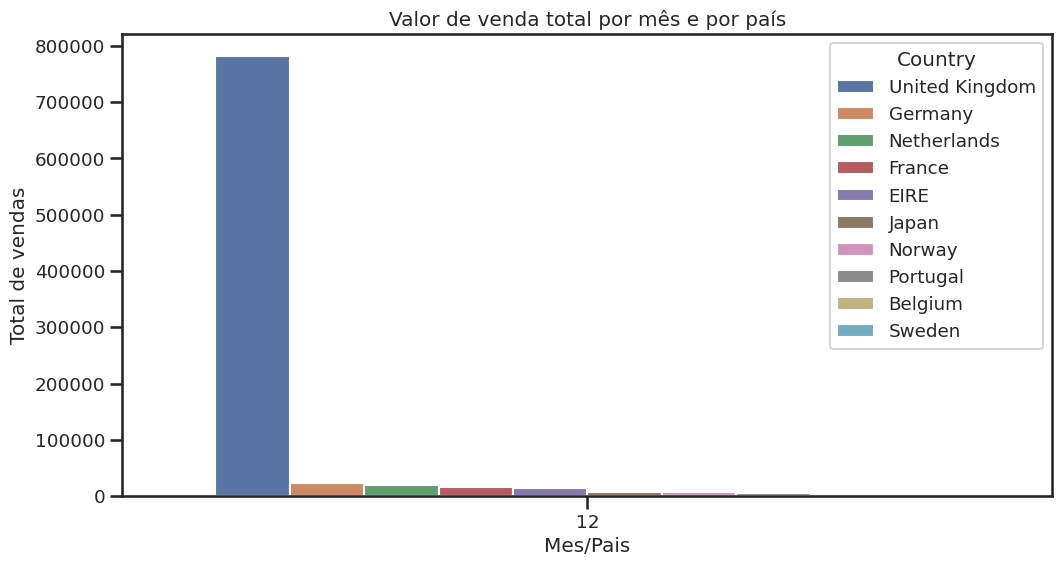

In [ ]:
# Valor de venda total por mês e por país (considere apenas os top 10)


sales_by_month_country = ecommerce_sem_nulos.groupby(["Month", "Country"])["TotalPrice"].sum().reset_index()

top_10_month_country = sales_by_month_country.sort_values(by=["Month", "TotalPrice"], ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_10_month_country, x="Month", y="TotalPrice", hue="Country")
plt.title("Valor de venda total por mês e por país")
plt.xlabel("Mes/Pais")
plt.ylabel("Total de vendas")

In [ ]:
# Etapa 10) Cálculo do RFM

# Suponha que você tenha um DataFrame chamado 'ecommerce' com os dados
# 'CustomerID', 'InvoiceNo', 'InvoiceDate' e 'TotalPrice'

# 1. Agrupe os dados por cliente e pedido (InvoiceNo) para obter a data e o preço total de cada pedido.
order_data = ecommerce_sem_nulos.groupby(['CustomerID', 'InvoiceNo']).agg({
    'InvoiceDate': 'max',  # Última data de compra do pedido
    'TotalPrice': 'sum'   # Total gasto no pedido
}).reset_index()

# 2. Calcule a recência (R)
# Suponha que a data atual seja 'current_date'
current_date = datetime.now()
order_data['Recency'] = (current_date - order_data['InvoiceDate']).dt.days

# 3. Calcule a frequência (F)
customer_frequency = order_data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
customer_frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# 4. Calcule o valor monetário (M)
customer_monetary = order_data.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_monetary.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)

# 5. Agrupe novamente os dados apenas por cliente e calcule o RFM
rfm_data = pd.merge(customer_frequency, customer_monetary, on='CustomerID')
rfm_data['Recency'] = rfm_data.groupby('CustomerID')['Recency'].min()  # Recência é a menor recência do cliente

# Agora, você tem um DataFrame 'rfm_data' com as colunas 'CustomerID', 'Recency', 'Frequency' e 'Monetary',
# que representam o RFM para cada cliente.